<center><div><img src = "http://china-bigdatauniversity.oss-cn-qingdao.aliyuncs.com/dolphin-labs/notebook-header-logo.png", width = 230/></div></center>

<center><h1 align=center><font size = 5>支持向量机(SVM)</font></h1> 

<h2 align=center><font size = 2>【课程性质：机器学习算法-基础】</font></h2></center>

## 1. 实验目标

使用Sklearn库操作机器学习

## 2. 实验主要使用的 $Python$ 库

|名称|版本|简介|
|----|----|----|
|$Numpy$|$1.16.0$|线性代数|
|$SKlearn$|$1.22.0$|机器学习|

## 3. 实验适用的对象

- 本课程假设您已经学习了 $Python$ 基础，具备可视化基础
- 学习对象：本科学生、研究生、人工智能、算法相关研究者、开发者
- 大数据分析与人工智能

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
<center>理论学习部分</center>
</div>

<p><b>机器学习(Machine Learning, ML)是人工智能(AI)的一个子集，是使计算机具有智能的根本途径。</b></p>
在本实验中，您将学习支持向量机（SVM）的基本思想、算法以及如何用Python实现。 

<font size=5>**概述**</font>

SVM 最早是由 Vladimir N. Vapnik 和 Alexey Ya. Chervonenkis 在1963年提出，目前的版本(soft margin)是由 Corinna Cortes 和 Vapnik 在1993年提出，并在1995年发表。深度学习（2012）出现之前，SVM 被认为机器学习中近十几年来最成功，表现最好的算法。

<p>支持向量机（SVM）是一种二类分类模型，它的基本模型是定义在特征空间上的间隔最大的线性分类器。支持向量机还包括核技巧，这使它成为实质上的费线性分类器。支持向量机的学习策略就是间隔最大化，可形式上化为一个求解凸二次规划的问题，即支持向量机的学习算法就是求解凸二次规划的最优化算法。</p>
<br>
<li>线性可分支持向量机（也称为硬间隔支持向量机）：当训练数据线性可分时，通过硬间隔最大化，学得一个线性可分支持向量机。</li>
<li>线性支持向量机（也称为软间隔支持向量机），当训练数据近似线性可分时，通过软间隔最大化，学得一个线性支持向量机。</li>
<li>非线性支持向量机：当训练数据线性不可分时，通过使用核技巧以及软间隔最大化，学得一个非线性支持向量机。</li>

<font size=3>**支持向量与超平面**</font>
<br>

在了解svm算法之前，我们首先需要了解一下线性分类器这个概念。比如给定一系列的数据样本，每个样本都有对应的一个标签。为了使得描述更加直观，我们采用二维平面进行解释，高维空间原理也是一样。
  
举个例子，假设在一个二维线性可分的数据集中，如下图图A所示，我们要找到一个超平面把两组数据分开，这时，我们认为线性回归的直线或逻辑回归的直线也能够做这个分类，这条直线可以是图一B中的直线，也可以是图一C中的直线，或者图一D中的直线，但哪条直线才最好呢，也就是说哪条直线能够达到最好的泛化能力呢？那就是一个能使两类之间的空间大小最大的一个超平面。
  
这个超平面在二维平面上看到的就是一条直线，在三维空间中就是一个平面...，因此，我们把这个划分数据的决策边界统称为超平面。离这个超平面最近的点就叫做支持向量，点到超平面的距离叫间隔。支持向量机就是要使超平面和支持向量之间的间隔尽可能的大，这样超平面才可以将两类样本准确的分开，而保证间隔尽可能的大就是保证我们的分类器误差尽可能的小，尽可能的健壮。

<img src="attachment:image.png" width="400">

<font size=3>**点到超平面的距离公式**</font>
<br><br>
  与二维空间类似，超平面的方程也可以写成如下形式：
$$w^Tx+b=0$$

  有了超平面的表达式之后之后，我们就可以计算样本点到平面的距离了。假设

$$P(x_1,x_2,…x_n)$$

  为样本的中的一个点，其中$x_i$表示为第个特征变量。那么该点到超平面的距离d就可以用如下公式进行计算：

$$d=\frac{|w_1*x_1+w_2*x_2+w_n*x_n+b|}{\sqrt{{w_1}^2+{w_2}^2+…+{w_n}^2}}=\frac{|W^T*X+b|}{||W||}$$

  其中$||W||$为w矩阵的二范数，常数b类似于直线方程中的截距。<br><br>
<font size=3>**最大间隔的优化模型**</font>
<br><br>
现在我们已经知道了如何去求数据点到超平面的距离，在超平面确定的情况下，我们就能够找出所有支持向量，然后计算出间隔margin。每一个超平面都对应着一个margin，我们的目标就是找出所有margin中最大的那个值对应的超平面。因此用数学语言描述就是确定w、b使得margin最大。这是一个优化问题其目标函数可以写成：
$$\max_{w, b} \left( min[y*(w^Tx+b)]\frac{1}{||w||} \right)$$

  类别标签用-1、1，是为了后期方便$y*(w^Tx+b)$的标识和距离计算；如果$y*(w^Tx+b)>0$表示预测正确，否则预测错误。
* 1、如果$y(w^Tx+b)>0$表示预测正确，也称函数间隔，$||w||$可以理解为归一化，也称几何间隔。
* 2、令$label*(w^Tx+b)>=1$， 因为0～1之间，得到的点是存在误判的可能性，所以要保障 $(min[y*(w^Tx+b)]=1)$，才能更好降低噪音数据影响。
* 3、所以本质上是求$\max_{w, b} \frac{1}{||w||}$；也就说，我们约束(前提)条件是: $y*(w^Tx+b)=1$

  为了后面计算的方便，我们将目标函数等价替换为：
  $$min\frac{1}{2}||w||^2$$
* 1、=> 就是求: $arg: \min_{w, b} ||w||$(求矩阵会比较麻烦，如果x只是$\frac{1}{2}*x^2$的偏导数，同样是求最小值)
* 2、=> 就是求: $arg: min_{w, b} (\frac{1}{2}*||w||^2)$(二次函数求导，求极值，平方也方便计算)
* 3、本质上就是求线性不等式的二次优化问题(求分隔超平面，等价于求解相应的凸二次规划问题)

**这是一个有约束条件的优化问题，通常我们可以用拉格朗日乘子法来求二次优化问题，代表要引入的拉格朗日乘子(Lagrange multiplier)：**

  $$L(w,b,\alpha)=\frac{1}{2} * ||w||^2 + \sum_{i=1}^{n} \alpha_i * [1 - y* (w^Tx+b)]$$
  
  求L关于求偏导数得：  
  $$\begin{cases}
 \frac{\partial L(w,b,\alpha)}{\partial w}=0\Rightarrow w=\sum_{i=1}^{n} \alpha_iy_ix_i \\
 \frac{\partial L(w,b,\alpha)}{\partial b}=0\Rightarrow \sum_{i=1}^{n} \alpha_iy_i
\end{cases}
$$
  带入计算得：
$$\begin{aligned}
 L(\alpha) &=\frac{1}{2}\sum_{i,j,=1}^{n} \alpha_i \alpha_j y_i y_jx_i^Tx_j-\sum_{i,j=1}^{n} \alpha_i \alpha_j y_i y_jx_i^Tx_j-b\sum_{i,j=1}^{n}\alpha_iy_i+\sum_{i=1}^{n}\alpha_i  \\
&=\sum_{i=1}^{n}\alpha_i -\frac{1}{2}\sum_{i,j=1}^{n} \alpha_i \alpha_j y_i y_jx_i^Tx_j
\end{aligned}$$
  
  现在转化到对偶问题的求解
$$
\begin{align}
maxL(\alpha)&=\sum_{i=1}^{n}\alpha_i-\frac{1}{2}\sum_{i,j=1}^{n} \alpha_i \alpha_j y_i y_jx_i^Tx_j\\
s.t
\end{align}
$$

 $$\begin{cases}
\sum_{i,j=1}^{n}\alpha_iy_i=0\\
\alpha_i>0,i=1,2…n
\end{cases}
$$

  该对偶问题的KKT条件为：  
 $$\begin{cases}
\alpha_i\ge 0\\
y_if(x_i)-1\ge0\\
\alpha_i(y_if(x_i)-1)=0
\end{cases}
$$

  到此，这里有个假设：数据必须是百分之百可分的。但是实际中的数据几乎都不那么“干净”，或多或少都会存在一些噪点。为此下面我们将引入了松弛变量来解决这种问题。

<font size=3>**松弛变量(slack variable)**</font>
<br><br>
由上一节的分析我们知道实际中很多样本数据都不能够用一个超平面把数据完全分开。如果数据集中存在噪点的话，那么在求超平的时候就会出现很大问题。从下图中课看出其中一个蓝点偏差太大，如果把它作为支持向量的话所求出来的margin就会比不算入它时要小得多。更糟糕的情况是如果这个蓝点落在了红点之间那么就找不出超平面了。

<img src="attachment:image.png" width="400">

  因此引入一个松弛变量$\xi$来允许一些数据可以处于分隔面错误的一侧。这时新的约束条件变为:
$$y_i(w^Tx_i+b)\ge1-\xi_i \quad i=1,2…n$$

  式中$\xi$的含义为允许第i个数据点允许偏离的间隔。如果让$\xi$任意大的话，那么任意的超平面都是符合条件的了。所以在原有目标的基础之上，我们也尽可能的让$\xi$的总量也尽可能地小。所以新的目标函数变为：
  $$min\frac{1}{2}||w||^2+C\sum_{i=1}^{N}\xi_i$$
  
  其中的C是用于控制“最大化间隔”和“保证大部分的点的函数间隔都小于1”这两个目标的权重。将上述模型完整的写下来就是：
$$min\frac{1}{2}||w||^2+C\sum_{i=1}^{N}\xi_i$$

$$s.t, \quad \xi\ge0,i=1,2…n$$

$$y_i(w^Tx_i+b)\ge1-\xi_i,i=1,2…n$$
  
  常量C是 惩罚因子, 表示离群点的权重（用于控制“最大化间隔”和“保证大部分点的函数间隔小于1.0” ）
* $y*(w^Tx+b) > 1$and $\alpha = 0$ (在边界外，就是非支持向量)
* $y*(w^Tx+b) = 1$and $0< \alpha < C$ (在分割超平面上，就支持向量)
* $y*(w^Tx+b) < 1$and $\alpha = C$ (在分割超平面内，是误差点 -> C表示它该受到的惩罚因子程度)

  C值越大，表示离群点影响越大，就越容易过度拟合；反之有可能欠拟合。
  
  我们看到，目标函数控制了离群点的数目和程度，使大部分样本点仍然遵守限制条件。例如：正类有10000个样本，而负类只给了100个（C越大表示100个负样本的影响越大，就会出现过度拟合，所以C决定了负样本对模型拟合程度的影响！，C就是一个非常关键的优化点。）
  
  经过添加松弛变量的方法，我们现在能够解决数据更加混乱的问题。通过修改参数C，我们可以得到不同的结果而C的大小到底取多少比较合适，需要根据实际问题进行调节。

<font size=5>**算法**</font>
<br><br>
给定数据集$T=\left\{(x_1,y_1),(x_2,y_2),\cdots(x_N,y_N)\right\},x_i\in\mathcal{X}\in\mathbb{R}^n,y_i\in\mathcal{Y}\in\mathbb{R},i=1,2,\cdots,N$，其中$x_i=(x_i^{(1)},x_i^{(2)},\cdots,x_i^{(n)})^T$

<b><p>（1）线性可分支持向量机</p></b>
<p><li>输入：线性可分训练数据集$T=\left\{(x_1,y_1),(x_2,x_2),\cdots,(x_N,y_N)\right\}$</li></p>
<p><li>输出：最大几何间隔的分离超平面和分类决策函数</li></p>
<p><li>算法步骤如下：</li></p>
<ul>
    （1）构造并且求解约束最优化问题：
    $$\min_{\vec{\alpha}}\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j(x_i·x_j)-\sum_{i=1}^N\alpha_i$$
    $$s.t.  \sum_{t=1}^N\alpha_iy_i=0$$
    $$\alpha_i\ge0,i=1,2,\cdots,N$$
   <ul>求解最优解$\vec{\alpha}^*=(\alpha_1^*,\alpha_2^*,\cdots,\alpha_N^*)^T$</ul>
   <br>
    （2）计算
    $$\vec{\omega}^*=\sum_{i=1}^N\alpha_i^*y_ix_i$$
  <ul>同时选择$\alpha^*$的一个正的分量$\alpha_j^*>0$，计算</ul>
    $$b^*=y_j-\sum_{i=1}^N\alpha_i^*y_i(x_i·x_j)$$
    
   <br>
    （3）由此得到最大几何分割分离超平面：$\vec{\omega}^*·x+b^*=0$，以及分类决策函数$f(\vec{x})=sign(\vec{\omega}^*·x+b^*)$
</ul>

<b><p>（2）线性支持向量机</p></b>
<p><li>输入：线性可分训练数据集$T=\left\{(x_1,y_1),(x_2,x_2),\cdots,(x_N,y_N)\right\}$和惩罚参数$C>0$</li></p>
<p><li>输出：软间隔最大化分离超平面和分类决策函数</li></p>
<p><li>算法步骤如下：</li></p>
<ul>
    （1）构造并且求解约束最优化问题：
    $$\min_{\vec{\alpha}}\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j(x_i·x_j)-\sum_{i=1}^N\alpha_i$$
    $$s.t.  \sum_{t=1}^N\alpha_iy_i=0$$
    $$C\ge\alpha_i\ge0,i=1,2,\cdots,N$$
   <ul>求解最优解$\vec{\alpha}^*=(\alpha_1^*,\alpha_2^*,\cdots,\alpha_N^*)^T$</ul>
   <br>
    （2）计算
    $$\vec{\omega}^*=\sum_{i=1}^N\alpha_i^*y_ix_i$$
  <ul>同时选择$\alpha^*$的一个正的分量$C>\alpha_j^*>0$，计算</ul>
    $$b^*=y_j-\sum_{i=1}^N\alpha_i^*y_i(x_i·x_j)$$
    
   <br>
    （3）由此得到最大几何分割分离超平面：$\vec{\omega}^*·x+b^*=0$，以及分类决策函数$f(x)=sign(\vec{\omega}^*·x+b^*)$
</ul>

<b><p>（3）非线性支持向量机</p></b>
<p><li>输入：线性可分训练数据集$T=\left\{(x_1,y_1),(x_2,x_2),\cdots,(x_N,y_N)\right\}$和惩罚参数$C>0$</li></p>
<p><li>输出：分类决策函数</li></p>
<p><li>算法步骤如下：</li></p>
<ul>
    （1）选择适当的核函数$K(x,z)$并且求解约束最优化问题：
    $$\min_{\vec{\alpha}}\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_jK(x_i,x_j)-\sum_{i=1}^N\alpha_i$$
    $$s.t.  \sum_{t=1}^N\alpha_iy_i=0$$
    $$C\ge\alpha_i\ge0,i=1,2,\cdots,N$$
   <ul>求解最优解$\vec{\alpha}^*=(\alpha_1^*,\alpha_2^*,\cdots,\alpha_N^*)^T$</ul>
   <br>
    （2）计算
    $$\vec{\omega}^*=\sum_{i=1}^N\alpha_i^*y_ix_i$$
  <ul>同时选择$\alpha^*$的一个正的分量$C>\alpha_j^*>0$，计算</ul>
    $$b^*=y_j-\sum_{i=1}^N\alpha_i^*y_iK(x_i,x_j)$$
    
   <br>
    （3）构造分类决策函数$f(\vec{x})=sign(\sum_{i=1}^N\alpha_i^*y_iK(x_i,x)+b^*)$
</ul>

---

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
<center>实践学习部分</center>
</div>

## 4. 实验步骤

### 步骤1 安装并引入必要的库

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

```python
!pip install numpy==1.16.0
!pip install scikit-learn==0.22.1
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [ ]:
# 请输入代码：



<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

```python
from sklearn.datasets import load_digits
from sklearn import svm
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [1]:
# 请输入代码：
from sklearn.datasets import load_digits
from sklearn import svm


c:\users\hp\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### 步骤2 digits数据集的介绍

digits数据集由1797个8x8图像组成，如下图所示。

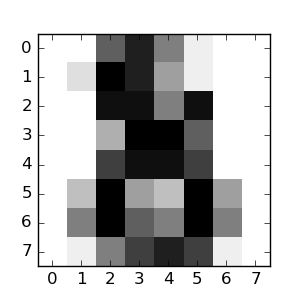

这些图像是由手写数字转换成的图片格式。 <br>
我们可以使用这些数据来训练我们的机器，以进一步确定其他特定数字形式的8x8图像！<br>
听起来就像我们在对数据做<i>分类</i> !

首先我们需要从**sklearn**<b>导入</b>数据集并对数据集命名。

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
digits = load_digits()
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [2]:
# 请输入代码：
digits = load_digits()


现在我们来看看digits数据集的<b>类型</b>和<b>数据</b>。 该类型应该是<i>'Bunch'</i>，它是一个类似于字典的对象，特别适用于加载sklearn内部示例数据集。

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
print (type(digits))
print (digits.data)
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [3]:
# 请输入代码：
print (type(digits))
print (digits.data)


<class 'sklearn.utils.Bunch'>
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


实际上，你不需要创建'Bunch'类型。 但他们提供了大量有用的信息来帮助初学者学习。

让我们来看看这个数据集的<b>描述(description)</b>了解更多信息！

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
print (digits.DESCR)
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [5]:
# 请输入代码：
print (digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

通过调用<b>目标（target）</b>字段，我们可以看到<i>分类</i>每个图像的类别（categories)。 一个数字与每个digit的分类相关联。 目标字段获取这些数字，其中每个数字都映射到target_names中的名称

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
print (digits.target)
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [4]:
# 请输入代码：
print (digits.target)


[0 1 2 ... 8 9 8]


现在我们打印出<b>target_names</b>, 我们可以找出数据被归类为：

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
print (digits.target_names)
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [6]:
# 请输入代码：
print (digits.target_names)


[0 1 2 3 4 5 6 7 8 9]


需要注意的一个重要信息是数据被存储为<i>numpy数据类型</i>，它是一个多维数组（ndarray）。

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
print (type(digits.data))
print (type(digits.target))
print (type(digits.target_names))
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [7]:
# 请输入代码：

print (type(digits.data))
print (type(digits.target))
print (type(digits.target_names))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


现在让我们确认数据和target的形状<br>
<b>注意</b>: 数据的形状是一个元组，其中第一个字段是观测值的数量，第二个字段是属性的数量。

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
print (digits.data.shape)
print (digits.target.shape)
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [8]:
# 请输入代码：

print (digits.data.shape)
print (digits.target.shape)

(1797, 64)
(1797,)


### 步骤3 拟合预测
我们可以为命名数据和目标，以用于训练机器！

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
X = digits.data
y = digits.target
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [9]:
# 请输入代码：
X = digits.data
y = digits.target


<b>拟合(fit)</b>

sklearn提供了三种基于svm的分类方法：

* sklearn.svm.NuSVC()
* sklearn.svm.LinearSVC()
* sklearn.svm.SVC()

#### 3.1 sklearn.svm.SVC()

  全称是C-Support Vector Classification，是一种基于libsvm的支持向量机，由于其时间复杂度为O(n^2)，所以当样本数量超过两万时难以实现。

  格式如下：
```
sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
                probability=False, tol=0.001, cache_size=200, class_weight=None, 
                verbose=False, max_iter=-1, decision_function_shape='ovr', 
                random_state=None)
```
  参数详解：
* C （float参数 默认值为1.0）
表示错误项的惩罚系数C越大，即对分错样本的惩罚程度越大，因此在训练样本中准确率越高，但是泛化能力降低；相反，减小C的话，容许训练样本中有一些误分类错误样本，泛化能力强。对于训练样本带有噪声的情况，一般采用后者，把训练样本集中错误分类的样本作为噪声。
* kernel （str参数 默认为‘rbf’）
   该参数用于选择模型所使用的核函数，算法中常用的核函数有：
    * -- linear：线性核函数
    * -- poly：多项式核函数
    * --rbf：径像核函数/高斯核
    * --sigmod：sigmod核函数
    * --precomputed：核矩阵，该矩阵表示自己事先计算好的，输入后算法内部将使用你提供的矩阵进行计算
* degree （int型参数 默认为3）
  该参数只对'kernel=poly'(多项式核函数)有用，是指多项式核函数的阶数n，如果给的核函数参数是其他核函数，则会自动忽略该参数。
* gamma （float参数 默认为auto）
  该参数为核函数系数，只对‘rbf’,‘poly’,‘sigmod’有效。如果gamma设置为auto，代表其值为样本特征数的倒数，即1/n_features，也有其他值可设定。
* coef0:（float参数 默认为0.0）
  该参数表示核函数中的独立项，只有对‘poly’和‘sigmod’核函数有用，是指其中的参数c。
* probability（ bool参数 默认为False）
  该参数表示是否启用概率估计。 这必须在调用fit()之前启用，并且会使fit()方法速度变慢。
* shrinkintol: float参数 默认为1e^-3g（bool参数 默认为True）
   该参数表示是否选用启发式收缩方式。
* tol（ float参数 默认为1e^-3）
   svm停止训练的误差精度，也即阈值。
* cache_size（float参数 默认为200）
  该参数表示指定训练所需要的内存，以MB为单位，默认为200MB。
* class_weight（字典类型或者‘balance’字符串。默认为None）
  该参数表示给每个类别分别设置不同的惩罚参数C，如果没有给，则会给所有类别都给C=1，即前面参数指出的参数C。如果给定参数‘balance’，则使用y的值自动调整与输入数据中的类频率成反比的权重。
* verbose （ bool参数 默认为False）
  该参数表示是否启用详细输出。此设置利用libsvm中的每个进程运行时设置，如果启用，可能无法在多线程上下文中正常工作。一般情况都设为False，不用管它。
* max_iter （int参数 默认为-1）
  该参数表示最大迭代次数，如果设置为-1则表示不受限制。
* random_state（int，RandomState instance ，None 默认为None）
  该参数表示在混洗数据时所使用的伪随机数发生器的种子，如果选int，则为随机数生成器种子；如果选RandomState instance，则为随机数生成器；如果选None,则随机数生成器使用的是np.random。
  
  方法：
* svc.decision_function(X)
  样本X到分离超平面的距离
* svc.fit(X, y[, sample_weight])
  根据给定的训练数据拟合SVM模型。
* svc.get_params([deep])
  获取此估算器的参数并以字典行书储存,默认deep=True，
* svc.predict(X)
   根据测试数据集进行预测
* svc.score(X, y[, sample_weight])
  返回给定测试数据和标签的平均精确度
* svc.predict_log_proba(X_test)，svc.predict_proba(X_test)
  当sklearn.svm.SVC(probability=True)时，才会有这两个值，分别得到样本的对数概率以及普通概率。

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
clf = svm.SVC(gamma=0.001, C=100)
clf.fit(X,y)
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [10]:
# 请输入代码：

clf = svm.SVC(gamma=0.001, C=100)
clf.fit(X,y)

SVC(C=100, gamma=0.001)

<b>预测(predict)</b>最后一位数字8

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
print('Prediction: %.2f' % clf.predict(digits.data[-1].reshape(1, -1)))
print('Actual: %.2f' % y[-1])
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [11]:
# 请输入代码：
print('Prediction: %.2f' % clf.predict(digits.data[-1].reshape(1, -1)))
print('Actual: %.2f' % y[-1])


Prediction: 8.00
Actual: 8.00


#### 3.2 sklearn.svm.LinearSVC()
LinearSVC（Linear Support Vector Classification）：线性支持向量分类，类似于SVC，但是其使用的核函数是”linear“上边介绍的两种是按照brf（径向基函数计算的，其实现也不是基于LIBSVM，所以它具有更大的灵活性在选择处罚和损失函数时，而且可以适应更大的数据集，他支持密集和稀疏的输入是通过一对一的方式解决的。<br>
  格式如下：
  ```
  Sklearn.svm.LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True,
                                   tol=0.0001, C=1.0, multi_class=’ovr’,fit_intercept=True,
                                   intercept_scaling=1,class_weight=None, verbose=0, 
                                   random_state=None, max_iter=1000)
  ```
  参数详解：
* C：目标函数的惩罚系数C，用来平衡分类间隔margin和错分样本的，default C = 1.0；
* loss：指定损失函数
* dual ：选择算法来解决对偶或原始优化问题。当nsamples>nfeaturesnsamples>nfeatures 时dual=false。
* tol ：（default = 1e - 3）: svm结束标准的精度;
* multi_class：如果y输出类别包含多类，用来确定多类策略， ovr表示一对多，“crammer_singer”优化所有类别的一个共同的目标 。如果选择“crammer_singer”，损失、惩罚和优化将会被被忽略。
* class_weight ：对于每一个类别i设置惩罚系数$C=class_weight[i]∗C$,如果不给出，权重自动调整为$n_samples/(n_classes∗np.bincount(y))$
* verbose：跟多线程有关

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

```python
cls = svm.LinearSVC()
cls.fit(X,y)
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [12]:
# 请输入代码：

cls = svm.LinearSVC()
cls.fit(X,y)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

<b>预测(predict)</b>最后一位数字8

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

```python
print('Prediction: %.2f' % cls.predict(digits.data[-1].reshape(1, -1)))
print('Actual: %.2f' % y[-1])
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [13]:
# 请输入代码：
print('Prediction: %.2f' % cls.predict(digits.data[-1].reshape(1, -1)))
print('Actual: %.2f' % y[-1])


Prediction: 8.00
Actual: 8.00


### 步骤4 支持向量机（SVM）的优缺点总结
  支持向量机的优势在于:
* 在高维空间中非常高效.
* 即使在数据维度比样本数量大的情况下仍然有效.
* 在决策函数（称为支持向量）中使用训练集的子集,因此它也是高效利用内存的.
* 通用性: 不同的核函数与特定的决策函数一一对应.常见的内核已经提供,也可以指定定制的内核.

  支持向量机的缺点包括:
* 如果特征数量比样本数量大得多,在选择核函数时要避免过拟合,而且正则化项是非常重要的.
* 支持向量机不直接提供概率估计,这些都是使用昂贵的五次交叉验算计算的.

---

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h4> 练习 1 </h4><br>
iris数据集以鸢尾花的特征作为数据来源，由3种不同类型的鸢尾花的50个样本数据构成。<br>
该数据集包含了4个属性：
<br>Sepal.Length（花萼长度）
<br>Sepal.Width（花萼宽度）
<br>Petal.Length（花瓣长度）
<br>Petal.Width（花瓣宽度）
<br>种类：Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），以及Iris Virginica（维吉尼亚鸢尾）。从sklean.datasets导入iris数据集，利用SVM对生物物种进行分类。
</div>

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [14]:
# 请输入代码：

from sklearn.datasets import load_iris
from sklearn import svm
iris = load_iris()
X = iris.data
y = iris.target
clf = svm.SVC(gamma=0.001, C=100)
clf.fit(X,y)
# 拟合(fit)和预测(predict)最后一朵维吉尼亚鸢尾花.
print('Prediction: %.2f' % clf.predict(iris.data[-1].reshape(1, -1)))
print('Actual: %.2f' % y[-1])

Prediction: 2.00
Actual: 2.00


<div align="right"class="answer-box-power">
<a href="#q2" class="btn btn-default" data-toggle="collapse">获取答案</a>
</div>
<div id="q2" class="collapse">
 代码：   

```python
from sklearn.datasets import load_iris
from sklearn import svm
iris = load_iris()
X = iris.data
y = iris.target
clf = svm.SVC(gamma=0.001, C=100)
clf.fit(X,y)
# 拟合(fit)和预测(predict)最后一朵维吉尼亚鸢尾花.
print('Prediction: %.2f' % clf.predict(iris.data[-1].reshape(1, -1)))
print('Actual: %.2f' % y[-1])
```
</div>

**感谢您完成本次实验！**

这是**支持向量机**实验的结尾。希望现在您对支持向量机及其结构和流程的工作有了更深入的了解。感谢您阅读本次实验，祝您学习愉快。

## 5.实验总结

对公开数据集的预测取得了非常好的效果，在多次调整参数后也依旧有良好的效果，这说明SVM模型具有良好的优越性以及鲁棒性。SVM的适用范围较广泛，且取得的效果也都不错。

**Debug**:由于numpy的版本较高 在代码运行过程中存在一些小问题 不过问题不大 对于目标的实现基本完成 就不对numpy就行降级处理

<hr>

[<img src = "https://dolphin-public.oss-cn-shanghai.aliyuncs.com/img/copyright.png">](http://www.dolphin-labs.com)